In [2]:
import praw
import requests
import pandas as pd
import json
from tqdm import tqdm
from datetime import datetime
import os, datetime as dt

In [3]:
with open("../redditCredentials.json", "r") as f:
    credentials = json.load(f)

In [4]:
reddit = praw.Reddit(client_id=credentials['CLIENT_ID'],
                     client_secret=credentials['SECRET_TOKEN'],
                     password=credentials['PASSWORD'],
                     user_agent='AITA-analysis',
                     username=credentials['USERNAME'],
                     check_for_async=False)

# Gathering 1000 top posts of the last year

In [ ]:
# Create an empty list to save all the element/dictionary
submissions_data = []

for submission in tqdm(
        reddit.subreddit("AmItheAsshole").top(limit=500, time_filter="year"),
        total=500,
        desc="Posts processed"):
    submission_data = {
        'author': '',
        'author_flair_text': '',
        'clicked': submission.clicked,
        'comments': submission.comments,
        'created_utc': submission.created_utc,
        'created_time': datetime.fromtimestamp(submission.created_utc),
        'distinguished': submission.distinguished,
        'edited': submission.edited,
        'id': submission.id,
        'is_original_content': submission.is_original_content,
        'is_self': submission.is_self,
        'link_flair_template_id': '',
        'link_flair_text': '',
        'locked': submission.locked,
        'name': submission.name,
        'num_comments': submission.num_comments,
        'over_18': submission.over_18,
        'permalink': submission.permalink,
        'poll_data': '',
        'saved': submission.saved,
        'score': submission.score,
        'selftext': '',
        'text': '',
        'spoiler': submission.spoiler,
        'stickied': submission.stickied,
        'subreddit': submission.subreddit,
        'title': submission.title,
        'upvote_ratio': submission.upvote_ratio,
        'url': submission.url
    }

    try:
        submission_data['poll_data'] = submission.poll_data
    except AttributeError:
        pass
    
    try:
        submission_data['author'] = submission.author
    except AttributeError:
        pass

    try:
        submission_data['author_flair_text'] = submission.author_flair_text
    except AttributeError:
        pass

    try:
        submission_data['link_flair_text'] = submission.link_flair_text
    except AttributeError:
        pass

    try:
        submission_data['link_flair_template_id'] = submission.link_flair_template_id
    except AttributeError:
        pass

    try:
        submission_data['selftext'] = submission.selftext
    except AttributeError:
        pass

    try:
        submission_data['text'] = submission.title + submission.selftext if pd.notna(submission.selftext) else submission.title
    except AttributeError:
        pass

    submissions_data.append(submission_data)

Posts processed:   0%|          | 0/500 [00:00<?, ?it/s]

Posts processed: 100%|██████████| 500/500 [30:45<00:00,  3.69s/it]


In [ ]:
#df = pd.DataFrame(submissions_data)

In [ ]:
# df.to_csv('top2000AITAlastyearSubmission.csv', index=False)

In [ ]:
df = pd.read_csv("top2000AITAlastyearSubmission.csv")

In [ ]:
df["link_flair_text"].value_counts()

link_flair_text
Not the A-hole              419
Not the A-hole POO Mode      24
Asshole                      15
Everyone Sucks               11
Not enough info              10
No A-holes here               5
Asshole POO Mode              5
UPDATE                        4
                              2
Not enough info POO Mode      2
No A-holes here POO Mode      1
Everyone Sucks POO Mode       1
Name: count, dtype: int64

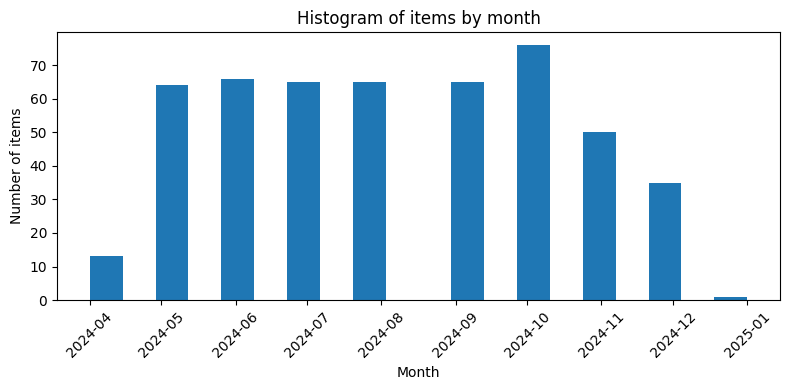

In [40]:
import matplotlib.pyplot as plt

# Suppose df["created_time"] is already a datetime64 column.
# Step 1: convert to month‐period, then back to a Timestamp (e.g. 2025-06-01)
df["created_month"] = df["created_time"].dt.to_period("M").dt.to_timestamp()

# Step 2: plot a histogram of those Timestamps
plt.figure(figsize=(8,4))
plt.hist(df["created_month"], bins=20)      # choose bins as you like (e.g. 12, 24, etc.)
plt.xlabel("Month")
plt.ylabel("Number of items")
plt.title("Histogram of items by month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
